# Implementing K-means clustering in Scikit-Learn

## 1. Create synthetic data

In [1]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

Let us visualize the data tha we just created above.

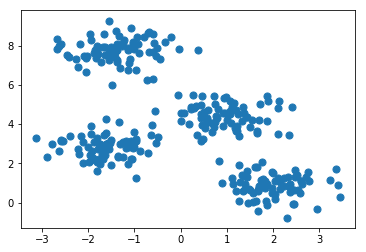

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

Alternatiely, we can plot the data according to their true labels (which are stored in the variable *y_true*)

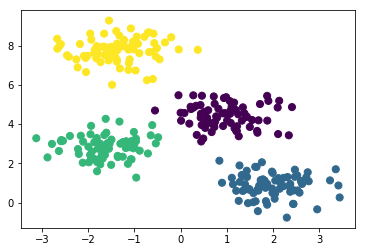

In [3]:
plt.scatter(X[:,0], X[:,1], s=50, c=y_true)
plt.show()

## 2. Implement K-means clustering

First thing is to import the KMeans class/module from sklearn.

In [4]:
from sklearn.cluster import KMeans

Then, set up the classifier by specifying how many clusters you are looking for.  

In [19]:
kmeans = KMeans(n_clusters = 5, random_state = 42) # Note that I intentionally assumed 5 clusters, instead of 4 clusters.

Now, we are ready to train a model (i.e., to cluster the data we created in the first step).

In [20]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

The clustering is done. Now let us visualize the clustering results.

## 3. Visualize results

The cluster labels that each data point is assigned to are stored in *labels_* attribute. The cluster centers that were found by the K-means clustering algorithm are stored in *cluster\_centers_* attribute.

To learn more about K-means clustering, please refer to this offical Scikit-learn webpage on [K-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [21]:
kmeans.labels_

array([1, 4, 2, 0, 1, 1, 3, 2, 0, 0, 3, 4, 2, 4, 1, 2, 2, 1, 3, 3, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 2, 0, 4, 2, 4, 4, 4, 4, 4, 3, 1, 2, 3, 2, 2,
       3, 3, 0, 3, 4, 1, 3, 1, 0, 1, 1, 3, 0, 3, 4, 1, 4, 2, 0, 3, 3, 3,
       4, 1, 4, 3, 2, 3, 0, 3, 3, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
       4, 4, 2, 1, 4, 3, 3, 2, 1, 1, 2, 3, 0, 1, 0, 1, 2, 1, 1, 2, 4, 2,
       3, 3, 1, 4, 1, 2, 4, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 0, 3,
       3, 1, 4, 3, 3, 4, 2, 0, 4, 3, 2, 3, 2, 3, 4, 2, 4, 4, 4, 2, 4, 2,
       1, 3, 0, 3, 1, 2, 4, 2, 2, 1, 2, 3, 3, 2, 1, 2, 2, 0, 1, 2, 3, 0,
       1, 1, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 4, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 4, 2, 3, 1, 3, 2, 4, 3, 0, 2, 4, 2, 3, 2, 2, 4, 3, 3, 1, 1, 2,
       4, 1, 1, 3, 1, 3, 2, 0, 0, 2, 2, 0, 2, 1, 3, 2, 1, 3, 0, 3, 1, 2,
       1, 4, 4, 4, 4, 3, 3, 4, 2, 3, 1, 2, 3, 3, 3, 1, 1, 4, 2, 2, 3, 1,
       0, 3, 2, 0, 2, 1, 1, 3, 3, 2, 1, 1, 1, 2, 0, 4, 1, 1, 2, 1, 1, 1,
       4, 3, 0, 2, 1, 1, 4, 0, 0, 1, 1, 2, 0, 3])

In [22]:
kmeans.cluster_centers_

array([[-0.85818041,  8.16999589],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906],
       [-1.58438467,  2.83081263],
       [-1.73612968,  7.46038138]])

Let us plot up the clustering results.

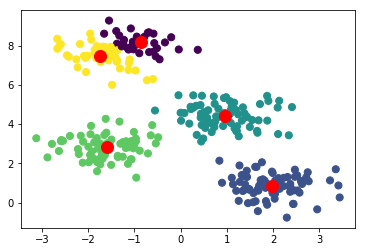

In [23]:
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], 'ro', markersize=12)
plt.show()

In the above, each color represents one cluster. The red dots represent the cluster centers that were discovered by K-means clustering.

## 4. Find optimal number of clusters

Specifying the number of clusters is always challenging for clustering, especially for big volume of data with many features. It is not always obvious how many clusters there are in the data. There have been many empirical methods developed to help determin the optimal number of clusters. You can google 'how to determine number of clusters', or simply 'cluster validity' to learn more on this subject.

### Elbow method

We are going to use a very simple method to determine the number of clusters for this simple case. This method is known as 'elbow method'. The 'elbow method' tries a whole bunch of different values for the number of clusters, and for each one, run a K-means clustering, and calculate the sum of the squared distance between each data point to the nearest cluster center. (This sum of the squared distance is called *inertia_* in Sciki-learn. You can also understand this inertia as error.) Then we can plot up the inertias against the number of clusters. As the number of clusters increase, the distance (or the error) decreases. The elbow of the curve represents the point where increasing the number of clusters does not help decrease the error as much. The number of clusters corresponding to this elbow point is considered as optimal.

### Implementing elbow method

In [24]:
inertia = []
numK = []
maxK = 20
for k in range(1,maxK):
    kmeans = KMeans(n_clusters = k, random_state=42).fit(X)
    numK.append(k)
    inertia.append(kmeans.inertia_)

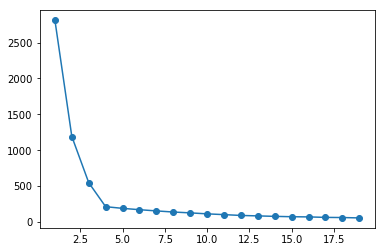

In [25]:
plt.plot(numK,inertia,'-o')
plt.show()

It turns out that, for this simple case, the elbow point indeed corresponds to the true number of clusters, which is 4 in this case.

Note that, for field data with noise, your curve would not look so beautiful, and the elbow poin would not be so clearly defined.

## 5. K-means clustering with optimal number of clusters

Now that, we have found the optimal number of clusters, 4, let us re-run the K-means with this optimal number of clusters.

In [26]:
kmeans = KMeans(n_clusters = 4, random_state = 42).fit(X)

Now, let us plot up the clustering results.

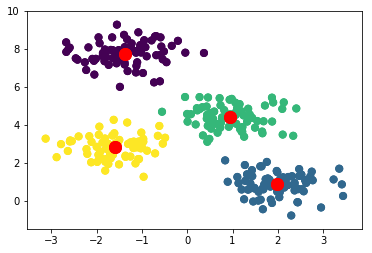

In [28]:
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], 'ro', markersize=12)
plt.show()

Perfect!